#### **1.准备工作：在Python中安装OpenCV包**
#### **2.导入必要的模块（OpenCV、numpy、matplotlib等）**
#### **3.使用OpenCV读取一张彩色图像，分析这张图像的分辨率、颜色通道等属性**

In [1]:
# 1
# cv2 是 OpenCV 库，用于图像和视频处理。
# matplotlib.pyplot 是用于绘图和可视化的库，常用于显示图像和绘制图表。
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### **4.使用matplotlib显示这张图像**

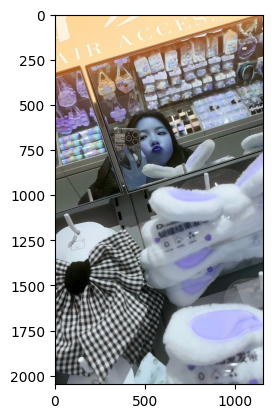

In [2]:
# 4
img_path = r"E:\HuaweiMoveData\Users\yelan\Pictures\X\retouch_2025051719051574.jpg"
img = cv2.imread(img_path, 1)
plt.imshow(img)

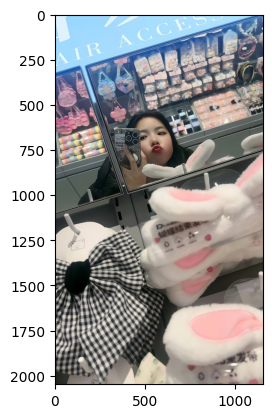

In [3]:
# 转换为原图格式RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [4]:
# 分离RGB通道,RGB(0,0,0)0-1-2 
r_channel = RGB_img.copy()
r_channel[:, :, 1] = 0  # 关闭绿色通道
r_channel[:, :, 2] = 0  # 关闭蓝色通道

g_channel = RGB_img.copy()
g_channel[:, :, 0] = 0  # 关闭红色通道
g_channel[:, :, 2] = 0  # 关闭蓝色通道

b_channel = RGB_img.copy()
b_channel[:, :, 0] = 0  # 关闭红色通道
b_channel[:, :, 1] = 0  # 关闭绿色通道


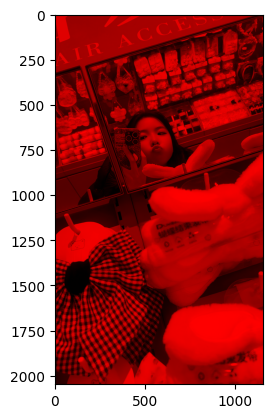

In [5]:
# 显示R通道
plt.imshow(r_channel)

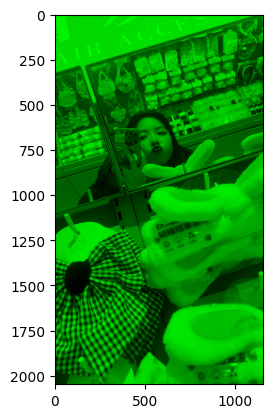

In [6]:
# 显示G通道
plt.imshow(g_channel)

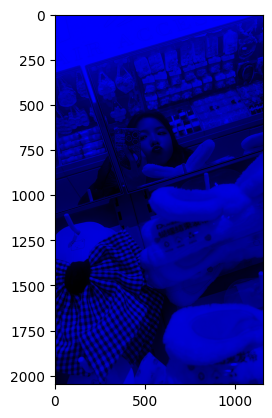

In [7]:
# 显示B通道
plt.imshow(b_channel)

#### **5.将这张图像从RGB颜色空间转为Lab颜色空间，并显示Lab各个颜色通道**

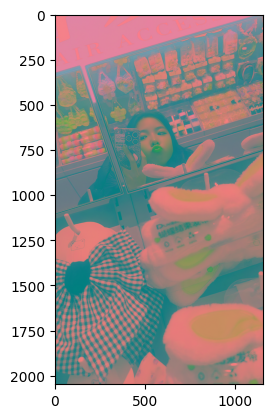

In [8]:
# 5
Lab_img = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2Lab)
plt.imshow(Lab_img)

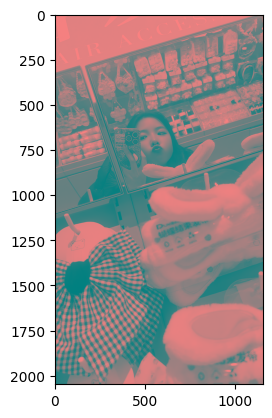

In [9]:
# 将Lab通道分离，Lab(0,128,128)0-1-2
# 显示L通道
l_channel = Lab_img.copy()
l_channel[:, :, 1] = 128  # 关闭a通道
l_channel[:, :, 2] = 128  # 关闭b通道
plt.imshow(l_channel)

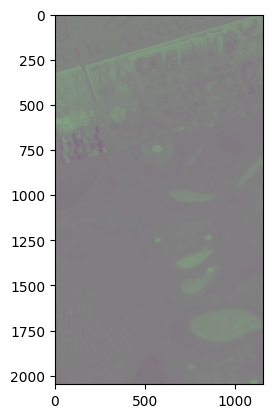

In [10]:
# 显示a通道
a_channel = Lab_img.copy()
a_channel[:, :, 0] = 128  # 关闭L通道
a_channel[:, :, 2] = 128  # 关闭b通道
plt.imshow(a_channel)

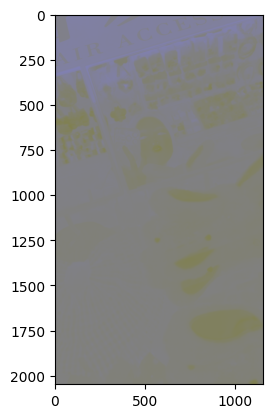

In [11]:
# 显示b通道
b_channel = Lab_img.copy()
b_channel[:, :, 0] = 128  # 关闭L通道
b_channel[:, :, 1] = 128  # 关闭a通道
plt.imshow(b_channel)

#### **6.将这张图像从RGB颜色空间转为HSV颜色空间，并显示HSV各个颜色通道**

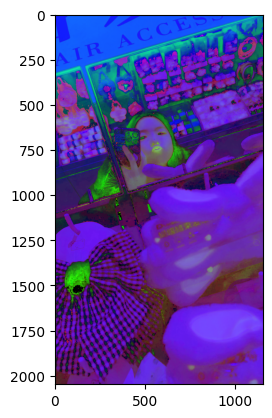

In [12]:
# 6
hsv_img = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

In [13]:
# 分离HSV颜色通道，HSV(0,0,0)0-1-2
H_channel = hsv_img.copy()
H_channel[:, :, 1] = 0  # 关闭S通道
H_channel[:, :, 2] = 0  # 关闭V通道

S_channel = hsv_img.copy()
S_channel[:, :, 0] = 0  # 关闭H通道
S_channel[:, :, 2] = 0  # 关闭V通道

V_channel = hsv_img.copy()
V_channel[:, :, 0] = 0  # 关闭H通道
V_channel[:, :, 1] = 0  # 关闭S通道

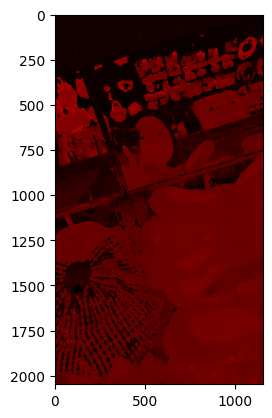

In [14]:
# 显示H通道
plt.imshow(H_channel)

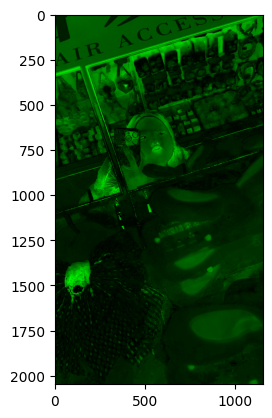

In [15]:
# 显示S通道
plt.imshow(S_channel)

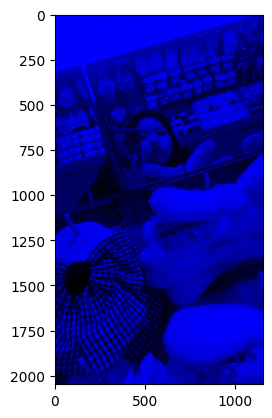

In [16]:
# 显示V通道
plt.imshow(V_channel)

#### **7.尝试调节图像对比度，显示图像调节前后的结果**

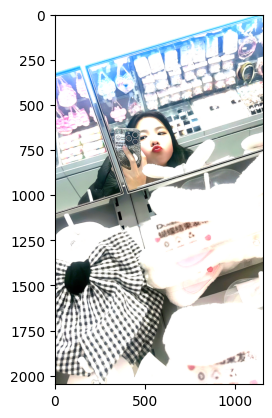

In [17]:
# 7
alpha = 2  # 定义对比度值
adjusted = cv2.convertScaleAbs(RGB_img, alpha=alpha)
plt.imshow(adjusted)

#### **8.尝试调节图像亮度，显示图像调节前后的结果**

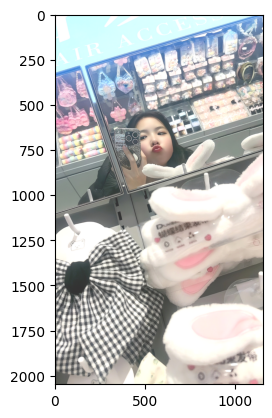

In [18]:
# 8
beta = 50 # 定义亮度值
brightened = cv2.convertScaleAbs(RGB_img, beta=beta)
plt.imshow(brightened)

#### **9.尝试调节图像饱和度，显示图像调节前后的结果**

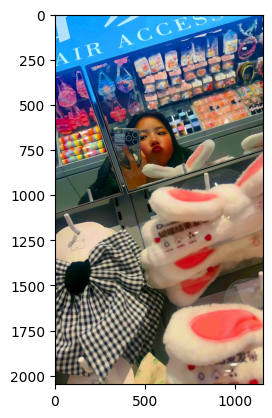

In [19]:
# 饱和度调节
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
hsv = np.array(hsv, dtype=np.float64) 
hsv[:, :, 1] = hsv[:, :, 1] * 2.5 # 定义了饱和度的值
hsv[:, :, 1][hsv[:, :, 1] > 255] = 255  # 防止溢出
hsv = np.array(hsv, dtype=np.uint8) 
saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) # 转会RGB格式
plt.imshow(saturated)

#### **10.对图像进行伽马变换，显示图像变换前后的结果**

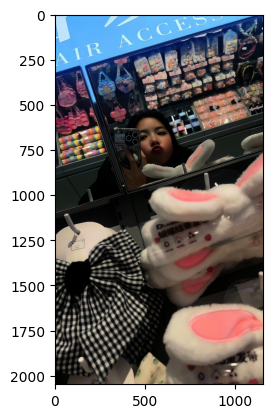

In [20]:
# 伽马值调节 
gamma = 2.2 # 定义伽马值
lookUpTable = np.empty((1,256), np.uint8) # 创建查找表
for i in range(256): # 256灰度级
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255) # 计算查找表
gamma_corrected = cv2.LUT(RGB_img, lookUpTable) # 应用查找表进行伽马校正
plt.imshow(gamma_corrected)